# Lista 2 - Física Atômica e Molecular A

## Preliminares

### Coordenadas Esferoidais Prolatas

Conforme visto em aulas anteriores, foram introduzidas as coordenadas esferoidais prolatas

\begin{equation}
\begin{cases}
    x = a \sinh(\mu)\sin(\nu)\cos(\varphi)\\
    y = a \sinh(\mu)\sin(\nu)\sin(\varphi)\\
    z = a \cosh(\mu)\cos(\nu)
\end{cases}
\end{equation}


Onde $a \in \mathbb{R}$, $\mu \in [0,\infty)$, $\nu \in [0, \pi]$ e $\varphi \in [0,2\pi]$. Por conveniênica, introduz-se as substituições:

\begin{equation}
\begin{cases}
    \xi = \cosh(\mu)\\
    \eta = a \cos(\nu)\\
    R = 2a     
\end{cases}
\end{equation}

No caso, $\xi \in [1,\infty)$ e $\eta \in [-1, 1]$. Neste sistema de coordenadas, um elemento de volume infinitesimal é escrito como:

$$dV = \dfrac{R^3}{8}(\xi^2 - \eta^2) d\xi d\eta d\varphi$$

De aulas anteriores, sabemos que:

$$
    \xi = \dfrac{r_1 + r_2}{R}
$$

$$
    \eta = \dfrac{r_1 - r_2}{R}
$$

## Questão 5

Para fazer os cálculos e os gráficos, será utilizada a linguagem Python (versão 3.8.2) com as bibliotecas a seguir:

In [76]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

Em seguida, definem-se algumas funções de conversão de unidades (mais especificamente, de Hartree para kcal/mol e eV.

In [77]:
#Conversões de unidades
def kcalMol(x): 
    return x/0.0015

def eV(x):
    return kcalMol(x)/23.0605

def angs(x):
    return x*0.5292

Em seguida, declara-se a energia exata do estado fundamental do átomo de hidrogênio (em Ha):

In [78]:
#Energia exata do estado fundamental do átomo de H
E_H = 0.47

Realiza-se, então, a declaração das variáveis e expresões simbólicas por meio da biblioteca `sympy`:

In [79]:
R = sym.Symbol('R')

e11 = (1-sym.exp(-2*R)*(1+R))/R
e12 = sym.exp(-1*R)*(1+R)
s12 = sym.exp(-1*R)*(1+R+R*R/3)

expr_E1 = E_H + 1/R - (e11-e12)/(1-s12)
expr_E2 = E_H + 1/R - (e11+e12)/(1+s12)

print(type(e11), type(expr_E1))

<class 'sympy.core.mul.Mul'> <class 'sympy.core.add.Add'>


In [80]:
e11

(-(R + 1)*exp(-2*R) + 1)/R

In [81]:
e12

(R + 1)*exp(-R)

In [82]:
s12

(R**2/3 + R + 1)*exp(-R)

A partir das expressões declaradas acima, pode-se definir as funções que atuarão em arrays do `numpy` para gerar as CEPs por meio do comando `lambdify()`.

In [83]:
E1 = sym.lambdify(R, expr_E1, 'numpy')
E2 = sym.lambdify(R, expr_E2, 'numpy')

In [84]:
print(type(E1), type(E2))

<class 'function'> <class 'function'>


Declara-se, então, os arrays com os valores de R para os quais deseja-se calcular a SEP

In [85]:
vec_R = np.arange(0.5, 10, 0.1)
vec_R

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

Para realizar o cálculo dos pontos, basta fazer:

In [86]:
cepE1 = E1(vec_R) - E2(100)
cepE2 = E2(vec_R) - E2(100)

In [87]:
cepE1

array([2.33873890e+00, 1.92747103e+00, 1.62271729e+00, 1.38696027e+00,
       1.19889118e+00, 1.04540102e+00, 9.17918484e-01, 8.10564503e-01,
       7.19148759e-01, 6.40589526e-01, 5.72560844e-01, 5.13268637e-01,
       4.61303421e-01, 4.15540342e-01, 3.75069468e-01, 3.39146034e-01,
       3.07154157e-01, 2.78579901e-01, 2.52990947e-01, 2.30021017e-01,
       2.09357787e-01, 1.90733390e-01, 1.73916883e-01, 1.58708205e-01,
       1.44933287e-01, 1.32440070e-01, 1.21095233e-01, 1.10781483e-01,
       1.01395308e-01, 9.28450839e-02, 8.50494931e-02, 7.79361802e-02,
       7.14406114e-02, 6.55051016e-02, 6.00779800e-02, 5.51128729e-02,
       5.05680843e-02, 4.64060596e-02, 4.25929198e-02, 3.90980548e-02,
       3.58937689e-02, 3.29549696e-02, 3.02588940e-02, 2.77848685e-02,
       2.55140958e-02, 2.34294671e-02, 2.15153951e-02, 1.97576658e-02,
       1.81433065e-02, 1.66604682e-02, 1.52983198e-02, 1.40469547e-02,
       1.28973054e-02, 1.18410679e-02, 1.08706335e-02, 9.97902674e-03,
      

In [88]:
cepE2

array([ 1.07865091e+00,  7.70771540e-01,  5.59156444e-01,  4.07574448e-01,
        2.95797459e-01,  2.11633741e-01,  1.47297109e-01,  9.75852187e-02,
        5.88944631e-02,  2.86542983e-02,  4.98600843e-03, -1.35117634e-02,
       -2.79025704e-02, -3.90056990e-02, -4.74604803e-02, -5.37714953e-02,
       -5.83409703e-02, -6.14923872e-02, -6.34879519e-02, -6.45416906e-02,
       -6.48293856e-02, -6.44961954e-02, -6.36625543e-02, -6.24287825e-02,
       -6.08787177e-02, -5.90825987e-02, -5.70993718e-02, -5.49785492e-02,
       -5.27617174e-02, -5.04837691e-02, -4.81739174e-02, -4.58565364e-02,
       -4.35518621e-02, -4.12765815e-02, -3.90443317e-02, -3.68661240e-02,
       -3.47507077e-02, -3.27048837e-02, -3.07337762e-02, -2.88410694e-02,
       -2.70292134e-02, -2.52996061e-02, -2.36527516e-02, -2.20884004e-02,
       -2.06056724e-02, -1.92031653e-02, -1.78790496e-02, -1.66311523e-02,
       -1.54570299e-02, -1.43540322e-02, -1.33193575e-02, -1.23501006e-02,
       -1.14432938e-02, -

Por fim, realiza-se o plot utilizando o `matplotlib`:

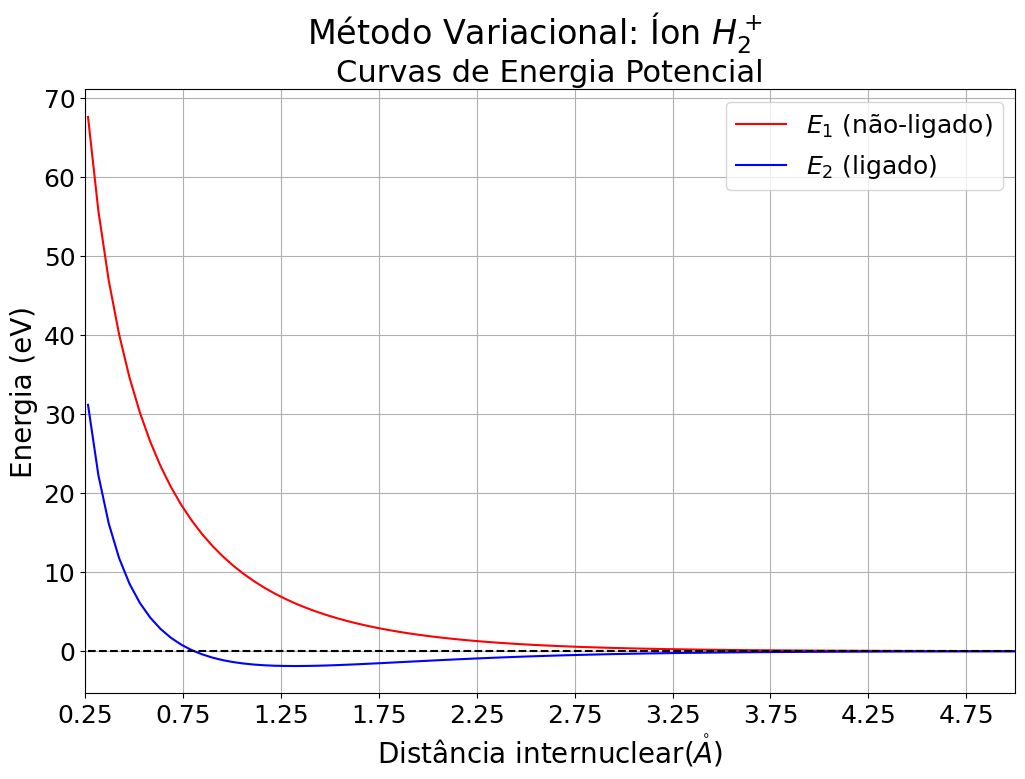

In [89]:
#Cria o fundo, o título e o subtítulo
plt.figure(figsize = (12, 8), dpi = 100)
plt.suptitle('Método Variacional: Íon $H_2^+$', fontsize=24)
plt.title('Curvas de Energia Potencial', fontsize=22)
plt.grid()

#Realiza o plot
plt.plot(angs(vec_R), eV(cepE1), 'r-', label = '$E_1$ (não-ligado)') #E1 (não-ligado)
plt.plot(angs(vec_R), eV(cepE2), 'b-', label = '$E_2$ (ligado)') #E2 (ligado)
plt.plot(angs(vec_R), np.zeros(len(vec_R)), 'k--') #linha tracejada indicando o zero

#Redefine os limites para os exios
plt.xlim(0.25, 5.)
plt.xticks(np.arange(0.25,5.1, 0.5), fontsize=18)
plt.yticks(fontsize=18)

#Rotula os eixos
plt.xlabel('Distância internuclear($\\mathring{A}$)', fontsize=20)
plt.ylabel('Energia (eV)', fontsize=20)

#Cria a legenda e exibe o gráfico
plt.legend(fontsize=18)
plt.show()

Nota-se que o estado ligado corresponde à energia $E_2$, ao passo que o estado não-ligado corresponde à energia $E_1$.

## Questão 6

Para realizar o refinamento do gráfico ao redor de $R = R_e$, utilizaremos o seguinte array advindo da análise do gráfico acima:

In [90]:
vec_Re = np.arange(1.5, 3.0, 0.001)
vec_Re

array([1.5  , 1.501, 1.502, ..., 2.997, 2.998, 2.999])

Calcula-se, então, a função $E_2(R)$ neste intervalo:

In [91]:
cepE2_e = E2(vec_Re) - E2(100)
cepE2_e

array([ 0.00498601,  0.00477745,  0.00456941, ..., -0.05913947,
       -0.05912053, -0.05910158])

Para descobrir $D_e$, isto é, o mínimo do array `cepE2_e`, podemos fazer:

In [105]:
De = cepE2_e.min()
print('De = {:.3f} eV'.format(eV(De)))

De = -1.874 A


E o valor correspondente de $R_e$ será:

In [107]:
Re = vec_Re[np.where(cepE2_e== cepE2_e.min())[0][0]]
print('Re = {:.3f} A'.format(angs(Re)))

Re = 1.319 A


## Questão 7

Podemos derivar simbolicamente a expressão de E2 por meio do `sym.diff()`:

In [108]:
expr_dE2 = sym.diff(expr_E2) #Derivada de E2
expr_dE2.simplify() #simplifica a expressão

(-3*R**2*(R + 1)*(R*(R + 1)*exp(R) - R + exp(2*R) - 1) - (R**2 + 3*R + 3*exp(R) + 3)**2*exp(R) + 3*(R**2 + 3*R + 3*exp(R) + 3)*(R**3*exp(R) - R*(2*R + 1) - R + exp(2*R) - 1))*exp(-R)/(R**2*(R**2 + 3*R + 3*exp(R) + 3)**2)

Usando o `lambdify()` para podermos avaliar a expressão em um array do `numpy`:

In [95]:
dE2 = sym.lambdify(R, expr_dE2, 'numpy')
type(dE2)

function

Pode-se derivar e igualar a zero para obter o $R_e$ e o $D_e$ usando a seguinte repetição:

In [109]:
for i in range(len(dE2(vec_Re))-1):
    if dE2(vec_Re)[i]*dE2(vec_Re)[i+1] < 0: #Avalia quando a derivada muda de sinal (i.e. passa pelo zero)
        Re = vec_Re[i]
        De = E2(Re) - E2(100)
        print('Re = {:.3f} A; De = {:.3f} eV'.format(angs(Re), eV(De)))

Re = 1.319 A; De = -1.874 eV
